#1. Darknet Clone

> GPU



In [1]:
# clone repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15097, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 15097 (delta 8), reused 9 (delta 2), pack-reused 15072
Receiving objects: 100% (15097/15097), 13.48 MiB | 24.09 MiB/s, done.
Resolving deltas: 100% (10253/10253), done.


In [2]:
!ls -al darknet

total 260
drwxr-xr-x 14 root root  4096 Jun 14 04:35 .
drwxr-xr-x  1 root root  4096 Jun 14 04:35 ..
drwxr-xr-x  4 root root  4096 Jun 14 04:35 3rdparty
drwxr-xr-x  3 root root  4096 Jun 14 04:35 build
-rwxr-xr-x  1 root root 22705 Jun 14 04:35 build.ps1
drwxr-xr-x  3 root root  4096 Jun 14 04:35 cfg
drwxr-xr-x  2 root root  4096 Jun 14 04:35 .circleci
drwxr-xr-x  3 root root  4096 Jun 14 04:35 cmake
-rw-r--r--  1 root root 24516 Jun 14 04:35 CMakeLists.txt
-rw-r--r--  1 root root  1406 Jun 14 04:35 DarknetConfig.cmake.in
-rw-r--r--  1 root root  9469 Jun 14 04:35 darknet_images.py
-rw-r--r--  1 root root 10334 Jun 14 04:35 darknet.py
-rw-r--r--  1 root root  6694 Jun 14 04:35 darknet_video.py
drwxr-xr-x  3 root root  4096 Jun 14 04:35 data
drwxr-xr-x  8 root root  4096 Jun 14 04:35 .git
drwxr-xr-x  4 root root  4096 Jun 14 04:35 .github
-rw-r--r--  1 root root   667 Jun 14 04:35 .gitignore
-rwxr-xr-x  1 root root   110 Jun 14 04:35 image_yolov3.sh
-rwxr-xr-x  1 root root   110 Jun 14 

In [5]:
%cd darknet

/content/darknet


In [6]:
!ls -al

total 260
drwxr-xr-x 14 root root  4096 Jun 14 04:35 .
drwxr-xr-x  1 root root  4096 Jun 14 04:35 ..
drwxr-xr-x  4 root root  4096 Jun 14 04:35 3rdparty
drwxr-xr-x  3 root root  4096 Jun 14 04:35 build
-rwxr-xr-x  1 root root 22705 Jun 14 04:35 build.ps1
drwxr-xr-x  3 root root  4096 Jun 14 04:35 cfg
drwxr-xr-x  2 root root  4096 Jun 14 04:35 .circleci
drwxr-xr-x  3 root root  4096 Jun 14 04:35 cmake
-rw-r--r--  1 root root 24516 Jun 14 04:35 CMakeLists.txt
-rw-r--r--  1 root root  1406 Jun 14 04:35 DarknetConfig.cmake.in
-rw-r--r--  1 root root  9469 Jun 14 04:35 darknet_images.py
-rw-r--r--  1 root root 10334 Jun 14 04:35 darknet.py
-rw-r--r--  1 root root  6694 Jun 14 04:35 darknet_video.py
drwxr-xr-x  3 root root  4096 Jun 14 04:35 data
drwxr-xr-x  8 root root  4096 Jun 14 04:35 .git
drwxr-xr-x  4 root root  4096 Jun 14 04:35 .github
-rw-r--r--  1 root root   667 Jun 14 04:35 .gitignore
-rwxr-xr-x  1 root root   110 Jun 14 04:35 image_yolov3.sh
-rwxr-xr-x  1 root root   110 Jun 14 

In [7]:
# change makefile to have GPU, OPENCV, CUDNN
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [8]:
# compile sources
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [9]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-06-14 04:38:25--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  38.4MB/s    in 6.6s    

2021-06-14 04:38:32 (35.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



#2. OpenCV YOLO Video

In [18]:
import cv2
import IPython
import numpy as np
import time
import math
from google.colab.patches import cv2_imshow

In [11]:
MIN_CONFIDENCE = 0.5
weight_file = 'yolov3.weights'
cfg_file = 'cfg/yolov3.cfg'
name_file = 'data/coco.names'
file_name = 'traffic_video.mp4'

In [12]:
# load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

In [13]:
classes = []
with open(name_file, 'r') as f:
  classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0,255,size=(len(classes),3))

In [14]:
# upload traffic_sign_video.mp4
from google.colab import files
files.upload()

Saving traffic_video.mp4 to traffic_video.mp4


In [32]:
frame_count = 0
writer = None
output_name = 'output_video.avi'

In [16]:
def writeFrame(img):
  global writer
  height, width = img.shape[:2]
  if writer is None and output_name is not None:
    fourcc = cv2.VideoWriter_fourcc(*"MJPG")
    writer = cv2.VideoWriter(output_name, fourcc, 24, (width, height), True)
  if writer is not None:
    writer.write(img)

In [33]:
def detectAndDisplay(frame):
    global frame_count
    frame_count += 1
    start_time = time.time()
    
    IPython.display.clear_output(wait=True)
    height, width, channedls = frame.shape
    # Detecting objects
    # https://docs.opencv.org/master/d6/d0f/group__dnn.html
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > MIN_CONFIDENCE:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # ROI
    mask = np.zeros((height, width), dtype='uint8')
    poly_top = int(0.65 * height)
    poly_bottom = int(0.85 * height)
    poly_left = int(0.47 * width)
    poly_right = int(0.53 * width)
    poly_margin = 50
    polygons = np.array([[(0+poly_margin,poly_bottom),(poly_left, poly_top), (poly_right, poly_top), (width-poly_margin, poly_bottom)]])
    cv2.fillPoly(mask, polygons, 255)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, MIN_CONFIDENCE, 0.4)
    font = cv2.FONT_HERSHEY_COMPLEX
    margin = 5
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            print(i, label)
            color = colors[i]
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, label, (x, y + 30), font, 0.5, (0, 255, 0), 1)
            # bitwise operation between box and mask
            box = np.array([[(x-margin,y+h+margin),(x-margin,y-margin), (x+w+margin, y), (x+w+margin,y+h+margin)]])
            cv2.fillPoly(mask, box, 0)

    # lane detection
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 40, 130)
    masked = cv2.bitwise_and(canny, mask)
    lines = cv2.HoughLinesP(masked, 2, np.pi/180, 20, np.array([]), 20, 10)
    if lines is not None:
      for line in lines:
        for x1, y1, x2, y2 in line:
          cv2.line(frame, (x1,y1), (x2,y2), (0,255,255), 5)
      

    frame_time = time.time() - start_time
    # print("Frame {} time {}".format(frame_count, frame_time))
    cv2_imshow(frame)
    writeFrame(frame)    

1 car
2 car
3 car
4 car
5 car
6 car


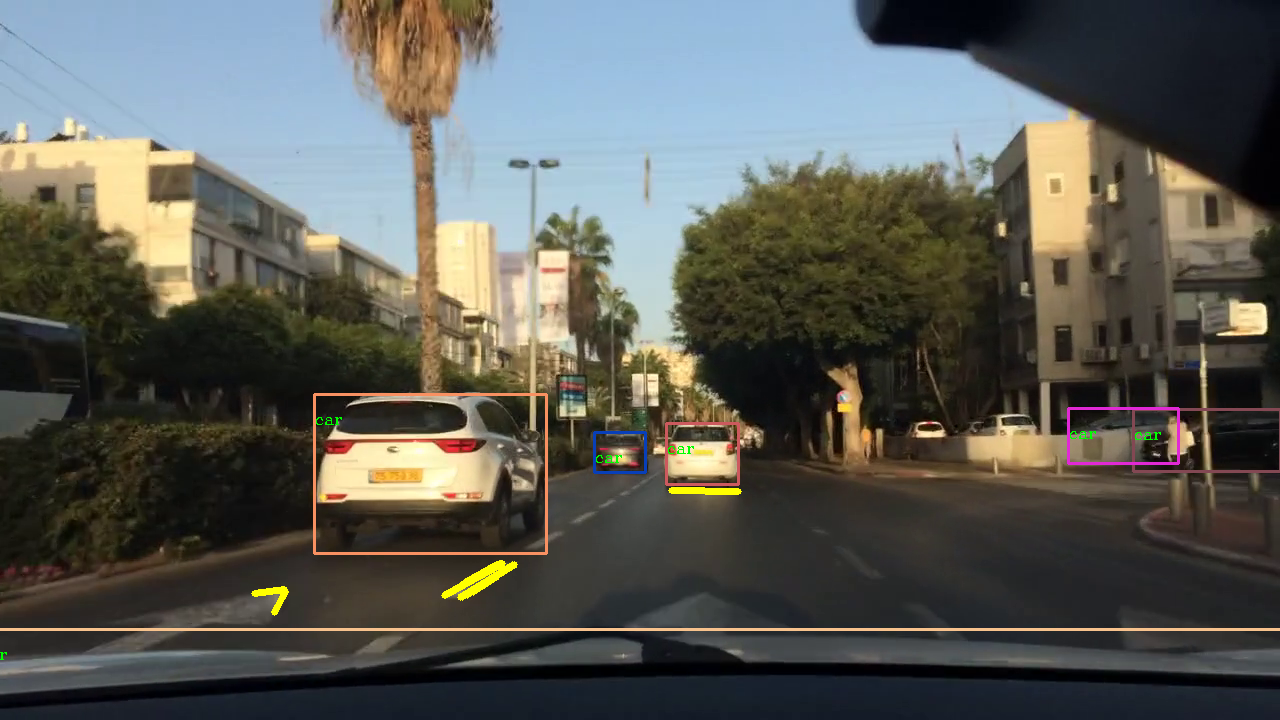

In [ ]:
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
  print("File load error")
  exit()

while True:
  ret, frame = cap.read()
  if frame is None:
    print("Done")
    break
  detectAndDisplay(frame)